In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### entropy

In [2]:
with open('./dataset/intervention_data/gpt2_train=False_entropy.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [3]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=False_Total.csv')
positive_effect = total_data.loc[total_data['entropy']>0].index
negative_effect = total_data.loc[total_data['entropy']<0].index

In [4]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [5]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [6]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        df_list.append(df)
        mean_df+=df

        v_arr = np.array(v)
        var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/len(positive_effect)
    

In [7]:
mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,-0.018569,0.001155,0.005903,0.023808,-0.025720,0.020104,0.007771,0.002134,-0.002886,0.004814,0.007700,0.009145,0.007572
neuron 1,-0.003656,-0.010921,-0.002277,-0.003014,0.000468,0.002166,0.010438,0.019681,0.021847,0.011643,0.010994,0.005556,0.003430
neuron 2,0.001680,0.017371,0.019192,0.026747,0.001749,0.024785,0.001939,0.005247,0.011924,0.010158,0.009825,0.012953,0.018574
neuron 3,0.004694,0.000374,-0.009011,-0.006740,0.006484,-0.004938,-0.003353,-0.002672,-0.001698,-0.006674,-0.013680,-0.015508,-0.004703
neuron 4,0.020363,0.005146,-0.032455,0.024661,-0.002335,0.000026,0.005915,0.003994,0.004573,-0.001375,-0.006020,-0.004033,-0.003624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.017096,0.023457,-0.052133,-0.063202,-0.060688,-0.055714,-0.034888,-0.016549,-0.011682,-0.000328,0.005976,0.000537,0.003022
neuron 764,-0.007491,-0.001258,0.002750,-0.001976,-0.000765,0.000360,0.002668,0.000768,-0.000284,-0.004876,-0.013220,-0.006481,-0.009149
neuron 765,0.044377,0.015610,-0.059483,-0.074031,-0.031687,-0.001916,0.000968,0.010581,0.007230,0.011171,0.017748,0.007263,0.009489
neuron 766,0.054265,0.016084,0.041982,0.009653,-0.007848,0.009987,0.005951,-0.001004,0.005512,0.004783,-0.000680,-0.004077,-0.010009


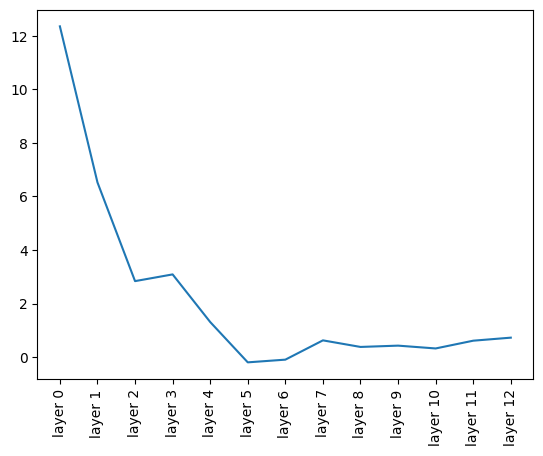

In [8]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

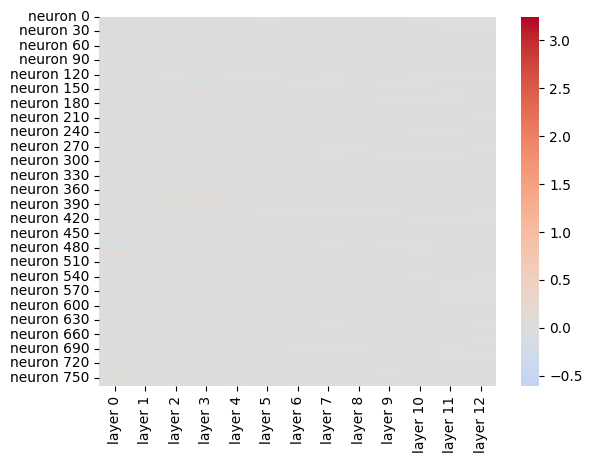

In [9]:
sns.heatmap(mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

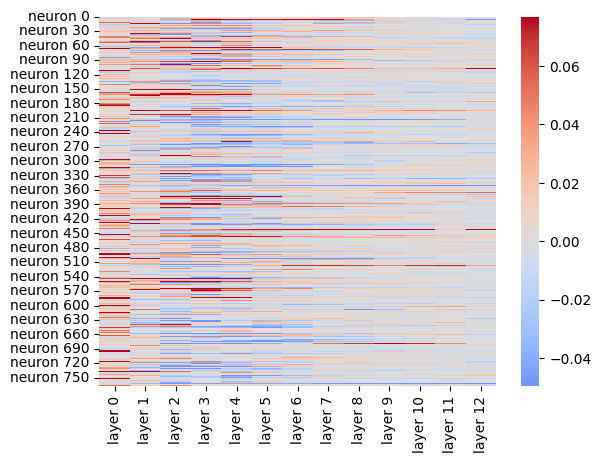

In [10]:
sns.heatmap(mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

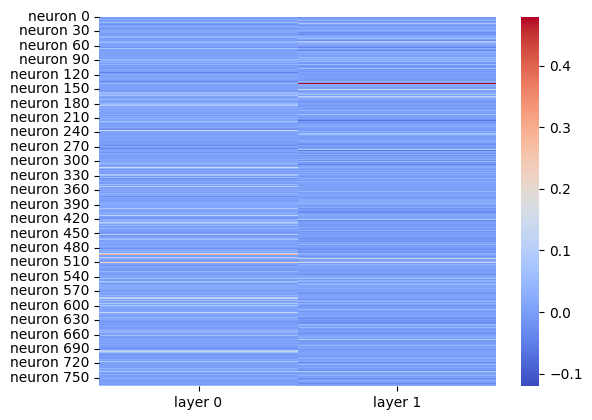

In [11]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

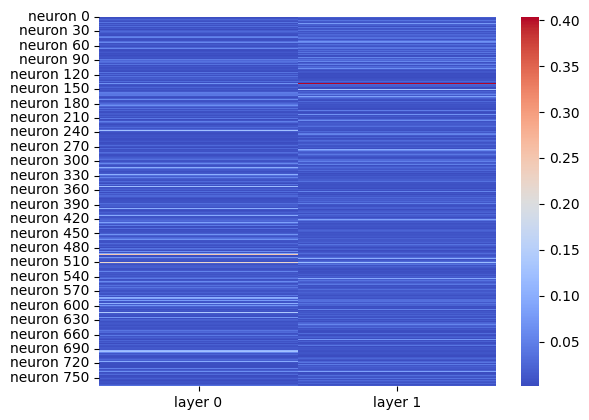

In [12]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm')

## Fine tuning Indirect Effect

### entropy

In [13]:
with open('./dataset/intervention_data/gpt2_train=True_entropy.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [14]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=True_Total.csv')
positive_effect = total_data.loc[total_data['entropy']>0].index
negative_effect = total_data.loc[total_data['entropy']<0].index

In [15]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [16]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [17]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        fine_df_list.append(df)
        fine_mean_df+=df

        v_arr = np.array(v)
        fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(fine_var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/len(positive_effect)
    

In [18]:
len(fine_df_list)

4380

In [19]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.000662,0.011258,0.014170,0.005966,0.003624,0.004932,-0.002613,-0.013905,-0.013900,-0.002638,-0.002849,0.006392,0.007582
neuron 1,0.001182,-0.003944,-0.006426,0.001491,-0.002529,-0.001210,-0.003520,-0.007831,-0.005343,-0.004914,-0.000363,-0.002469,-0.002275
neuron 2,-0.001923,0.011118,0.014191,0.006894,0.001541,0.003553,0.003521,0.002414,-0.000431,0.000051,-0.014024,-0.015538,-0.025568
neuron 3,-0.019692,-0.000818,-0.004070,-0.002443,-0.000815,-0.001324,0.001031,0.000310,0.001393,0.002199,0.005222,0.004217,0.004571
neuron 4,0.002770,0.001283,-0.004150,-0.004809,-0.005126,-0.005064,-0.003574,-0.001690,-0.001864,-0.003580,-0.018684,-0.023119,-0.021010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.004985,0.004953,0.000509,0.003534,0.001341,0.000192,-0.005593,0.000085,-0.005210,0.001637,0.004578,0.005884,0.001118
neuron 764,-0.011888,-0.008380,-0.000246,0.006703,0.003740,0.006158,0.005915,0.004520,0.007110,0.004677,-0.000368,-0.004977,-0.006820
neuron 765,-0.002628,-0.005379,-0.009565,-0.002531,-0.002355,-0.004266,0.004623,0.011951,0.016011,0.019801,0.018994,0.025118,0.035309
neuron 766,0.037346,0.003692,0.003910,0.001419,0.003834,0.002539,0.002149,0.001126,0.001822,0.000823,0.000779,-0.000947,-0.003824


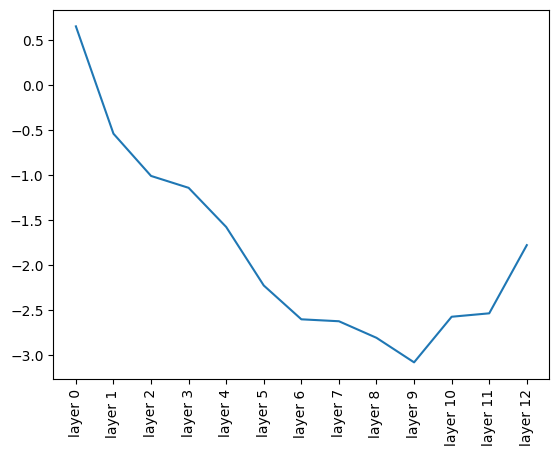

In [20]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

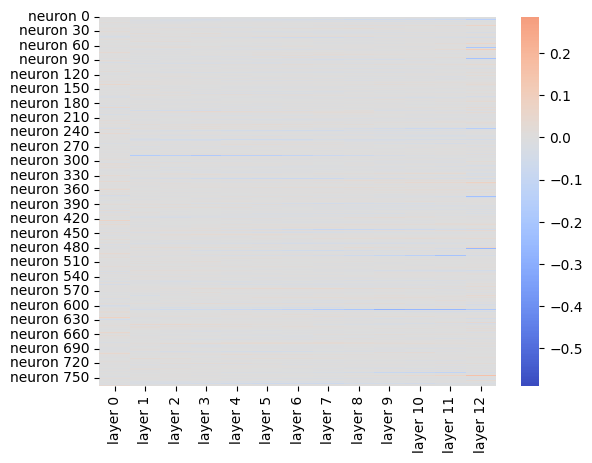

In [21]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

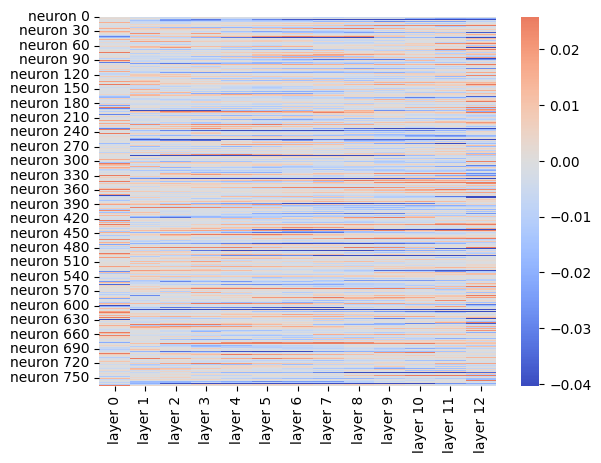

In [22]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

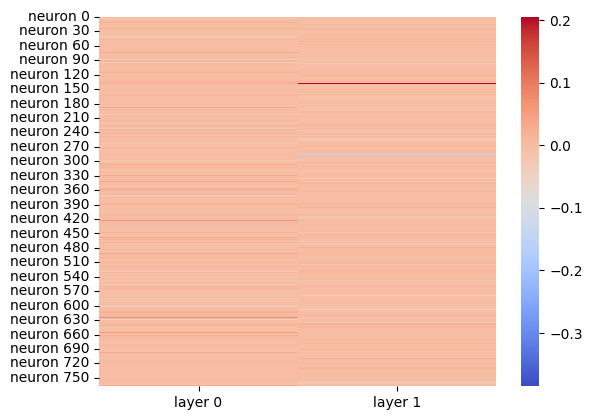

In [23]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

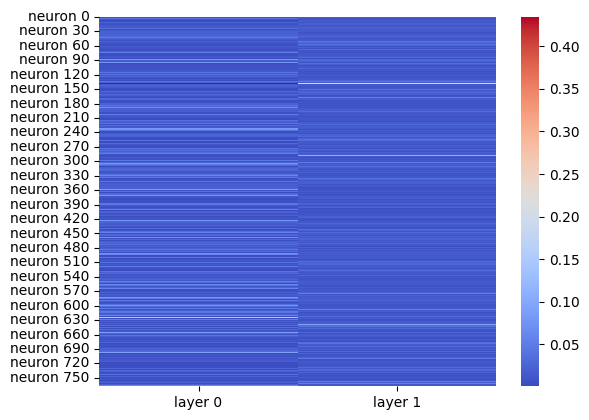

In [24]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm')

### Fine tuning 전,후 비교

In [25]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 752    0.329030
neuron 494    0.298720
neuron 510    0.232302
neuron 297    0.218843
neuron 264    0.204266
neuron 345    0.201327
neuron 233    0.162521
neuron 65     0.151440
neuron 661    0.144932
neuron 162    0.144805
neuron 313    0.140295
neuron 532    0.136164
neuron 177    0.134302
neuron 236    0.132496
neuron 614    0.129561
neuron 492    0.128953
neuron 695    0.125958
neuron 585    0.119015
neuron 364    0.112589
neuron 437    0.110788
Name: layer 0, dtype: float64

neuron 138    0.479661
neuron 92     0.367982
neuron 372    0.351997
neuron 503    0.323287
neuron 48     0.176048
neuron 35     0.173766
neuron 510    0.140987
neuron 151    0.132778
neuron 502    0.112520
neuron 165    0.111589
neuron 264    0.109253
neuron 615    0.101580
neuron 164    0.099353
neuron 737    0.099049
neuron 275    0.096777
neuron 670    0.093744
neuron 67     0.093280
neuron 51     0.093222
neuron 430    0.089353
neuron 544    0.087842
Name: layer 1, dtype: float64

In [26]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 264    0.091080
neuron 625    0.078795
neuron 423    0.067925
neuron 362    0.061926
neuron 262    0.059061
neuron 181    0.056949
neuron 656    0.052714
neuron 141    0.051456
neuron 106    0.049339
neuron 700    0.045782
neuron 426    0.044130
neuron 188    0.040521
neuron 162    0.040413
neuron 342    0.039777
neuron 359    0.039373
neuron 243    0.039234
neuron 437    0.037911
neuron 492    0.037561
neuron 766    0.037346
neuron 233    0.037234
Name: layer 0, dtype: float64

neuron 138    0.205870
neuron 92     0.072117
neuron 570    0.040572
neuron 639    0.040339
neuron 503    0.031210
neuron 710    0.029853
neuron 399    0.029529
neuron 396    0.025027
neuron 162    0.023481
neuron 478    0.023312
neuron 224    0.022753
neuron 479    0.022275
neuron 35     0.021943
neuron 643    0.021073
neuron 767    0.020392
neuron 233    0.020143
neuron 527    0.020017
neuron 343    0.019570
neuron 51     0.018463
neuron 241    0.017916
Name: layer 1, dtype: float64

In [27]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 234   -0.022699
neuron 615   -0.022820
neuron 16    -0.023099
neuron 267   -0.025395
neuron 505   -0.027526
neuron 40    -0.029084
neuron 266   -0.032103
neuron 273   -0.033325
neuron 622   -0.033528
neuron 481   -0.033781
neuron 391   -0.034147
neuron 640   -0.035178
neuron 134   -0.035545
neuron 401   -0.038019
neuron 395   -0.040193
neuron 85    -0.041077
neuron 115   -0.042440
neuron 451   -0.044539
neuron 218   -0.051086
neuron 38    -0.054787
Name: layer 0, dtype: float64

neuron 627   -0.036657
neuron 331   -0.037455
neuron 200   -0.038089
neuron 360   -0.038126
neuron 586   -0.038585
neuron 547   -0.039002
neuron 718   -0.039726
neuron 644   -0.042032
neuron 64    -0.043511
neuron 250   -0.043939
neuron 307   -0.048312
neuron 160   -0.055324
neuron 169   -0.057762
neuron 278   -0.058412
neuron 630   -0.060748
neuron 215   -0.064306
neuron 740   -0.073434
neuron 322   -0.078765
neuron 393   -0.084395
neuron 526   -0.120619
Name: layer 1, dtype: float64

In [28]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 347   -0.025868
neuron 761   -0.025893
neuron 663   -0.027721
neuron 529   -0.027914
neuron 191   -0.029119
neuron 41    -0.029350
neuron 203   -0.029618
neuron 232   -0.030102
neuron 95    -0.030948
neuron 100   -0.033268
neuron 364   -0.035016
neuron 556   -0.035062
neuron 341   -0.035638
neuron 600   -0.041004
neuron 371   -0.042760
neuron 629   -0.047502
neuron 9     -0.047617
neuron 88    -0.055527
neuron 401   -0.056554
neuron 337   -0.065553
Name: layer 0, dtype: float64

neuron 48    -0.019537
neuron 257   -0.020004
neuron 167   -0.020406
neuron 206   -0.021039
neuron 97    -0.024813
neuron 709   -0.026552
neuron 653   -0.026695
neuron 417   -0.026756
neuron 336   -0.026911
neuron 579   -0.028315
neuron 19    -0.028533
neuron 160   -0.028753
neuron 553   -0.031267
neuron 255   -0.038029
neuron 50    -0.038523
neuron 608   -0.039056
neuron 721   -0.043533
neuron 195   -0.047623
neuron 288   -0.166000
neuron 393   -0.385299
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐